In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.transform import (hough_line, hough_line_peaks)
import easyocr

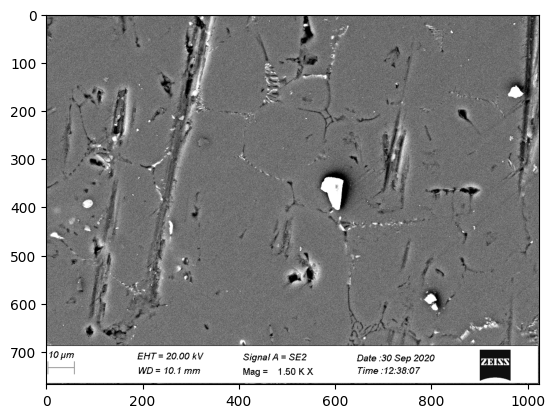

In [18]:
img_org1 = cv2.imread(r'C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_with_UST_G1.tif', cv2.IMREAD_UNCHANGED)
img_org1_bw = cv2.cvtColor(img_org1, cv2.COLOR_BGR2GRAY)
plt.imshow(img_org1_bw, cmap = 'gray')

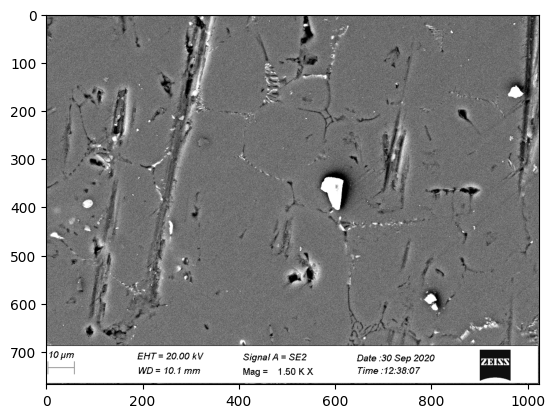

In [19]:
img_org1_bw = img_org1_bw
plt.imshow(img_org1_bw, cmap = 'gray')

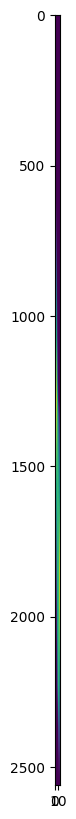

In [20]:
# Set a precision of 1 degree. (Divide into 180 data points)
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 18)

# Perform Hough Transformation to change x, y, to h, theta, dist space.
hspace, theta, dist = hough_line(img_org1_bw, tested_angles)

plt.figure(figsize=(10,10))
plt.imshow(hspace) 

In [21]:
#Now, to find the location of peaks in the hough space we can use hough_line_peaks
h, q, d = hough_line_peaks(hspace, theta, dist)

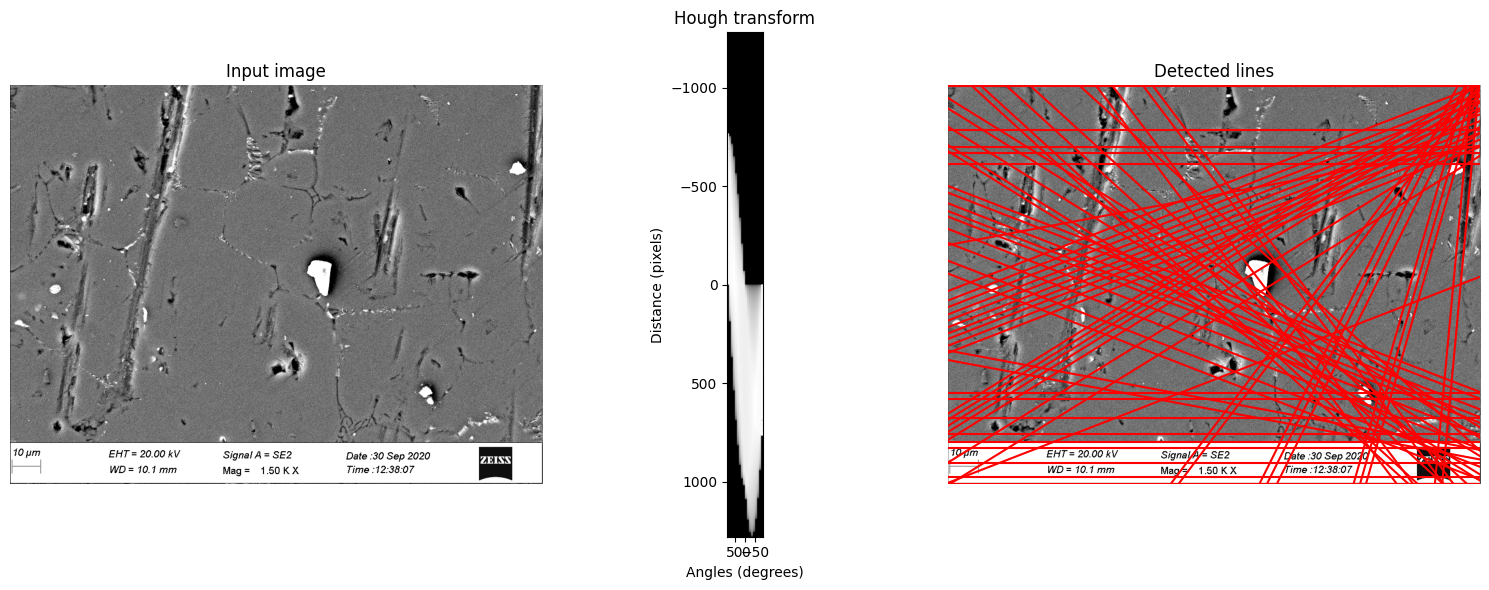

In [22]:
#Example code from skimage documentation to plot the detected lines
angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(img_org1_bw, cmap = 'gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(img_org1_bw, cmap='gray')

origin = np.array((0, img_org1_bw.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((img_org1_bw.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

In [23]:
#verdict --> doesn't work
"""
It is detecting non existent lines,
no matter however I change the precision
"""

In [24]:
# !pip install easyocr

     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     -- ------------------------------------- 0.2/2.9 MB 3.3 MB/s eta 0:00:01
     ------ --------------------------------- 0.4/2.9 MB 4.6 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/2.9 MB 5.7 MB/s eta 0:00:01
     ----------------- ---------------------- 1.2/2.9 MB 6.6 MB/s eta 0:00:01
     ------------------------ --------------- 1.7/2.9 MB 7.9 MB/s eta 0:00:01
     -------------------------- ------------- 1.9/2.9 MB 6.7 MB/s eta 0:00:01
     ----------------------------- ---------- 2.1/2.9 MB 6.5 MB/s eta 0:00:01
     ------------------------------- -------- 2.3/2.9 MB 6.2 MB/s eta 0:00:01
     ------------------------------- -------- 2.3/2.9 MB 6.2 MB/s eta 0:00:01
     ---------------------------------- ----- 2.5/2.9 MB 5.4 MB/s eta 0:00:01
     ---------------------------------------  2.8/2.9 MB 5.5 MB/s eta 0:00:01
     ---------------------------------------- 2.9/2.9 MB 5.1 MB/s eta 0

In [26]:
# https://machinelearningknowledge.ai/easyocr-python-tutorial-with-examples/
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |███-----------------------------------------------| 6.7% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [32]:
result = reader.readtext(img_org1_bw, detail = 1, paragraph = False)
# confidence is low,
# presumably because of micron symbol
result

[([[2, 696], [62, 696], [62, 720], [2, 720]], 'pum', 0.2789318297850926),
 ([[186, 698], [234, 698], [234, 722], [186, 722]], 'EHT', 0.6966811347259059),
 ([[246, 698], [330, 698], [330, 722], [246, 722]],
  '20O0kv',
  0.4783455080482169),
 ([[405, 699], [544, 699], [544, 727], [405, 727]],
  'FSignal A = SE2',
  0.4368467183378454),
 ([[642, 702], [720, 702], [720, 726], [642, 726]],
  'Date:30',
  0.4536817112377335),
 ([[760, 702], [812, 702], [812, 726], [760, 726]],
  'p2020',
  0.6500855284716157),
 ([[900, 710], [966, 710], [966, 734], [900, 734]],
  'ZEISS',
  0.9441226256741931),
 ([[188, 728], [324, 728], [324, 752], [188, 752]],
  'WD=101mm',
  0.3359433098222227),
 ([[480, 730], [558, 730], [558, 754], [480, 754]],
  '160KX',
  0.4900290361711025),
 ([[644, 728], [778, 728], [778, 752], [644, 752]],
  'Time : 12:38.07',
  0.38571016202846636),
 ([[720.8858279709377, 699.2145699273442],
   [761.7500878941253, 704.8012437384582],
   [758.1141720290623, 729.7854300726558],
  

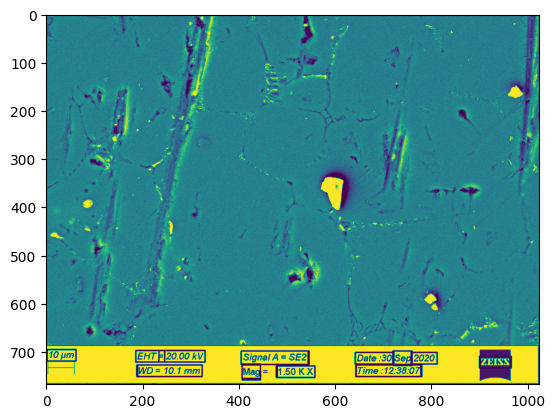

In [33]:
for (coord, text, prob) in result:

  (topleft, topright, bottomright, bottomleft) = coord
  tx,ty = (int(topleft[0]), int(topleft[1]))
  bx,by = (int(bottomright[0]), int(bottomright[1]))
  cv2.rectangle(img_org1_bw, (tx,ty), (bx,by), (0, 0, 255), 2)

plt.imshow(img_org1_bw)